In [97]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import xgboost as xgb
from scipy import stats


In [139]:
# Load the dataset (download from Kaggle and put the path here)
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')


In [140]:
# Checking the first few rows of the dataset
print(df.head())
print(df.info())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [141]:
### Data Cleaning and Handling Missing Values

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [142]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [143]:
df['contact'] = df['contact'].replace('unknown', None)
df['poutcome'] = df['poutcome'].replace('unknown', None)
df['education'] = df['education'].replace('unknown', None)
df['job'] = df['job'].replace('unknown', None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,None,5,may,1042,1,-1,0,None,yes
1,56,admin.,married,secondary,no,45,no,no,None,5,may,1467,1,-1,0,None,yes
2,41,technician,married,secondary,no,1270,yes,no,None,5,may,1389,1,-1,0,None,yes
3,55,services,married,secondary,no,2476,yes,no,None,5,may,579,1,-1,0,None,yes
4,54,admin.,married,tertiary,no,184,no,no,None,5,may,673,2,-1,0,None,yes


In [144]:
### Data Cleaning and Handling Missing Values

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


In [145]:
df = df.dropna(subset=['job', 'education'])
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      2241
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     7941
deposit         0
dtype: int64


In [154]:
df.head()
# df.drop('poutcome', inplace=True)
df = df.drop(['poutcome', 'contact'], axis=1)

In [155]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes


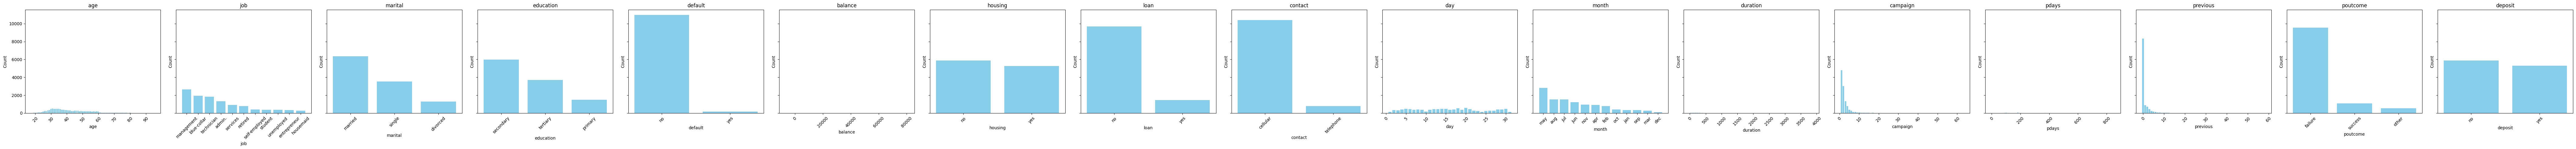

In [120]:
num_columns = len(df.columns)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 5), sharey=True)

# Plot each column in a separate subplot
for i, col in enumerate(df.columns):
    # Count occurrences
    value_counts = df[col].value_counts()
    
    # Plot
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [160]:
y = df['deposit']
X = df.drop(['deposit'], axis=1)
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5


In [170]:
# Label Encoding for the target variable 'y'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 0: no, 1: yes
y

array([1, 1, 1, ..., 0, 0, 0])

In [162]:
dummies = pd.get_dummies(X, columns = ['marital','housing','loan','job','education','default','month']).astype(int)

dummies

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,2343,5,1042,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,56,45,5,1467,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,41,1270,5,1389,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,55,2476,5,579,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,54,184,5,673,2,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11158,39,733,16,83,4,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
11159,32,29,19,156,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11160,43,0,8,9,2,172,5,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [174]:
# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(dummies, y, test_size=0.2, random_state=42)
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [175]:
### Model Training
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [169]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [176]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [177]:
### Model Evaluation
# Predict probabilities and labels
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]
y_pred = xgb_model.predict(X_val)

In [178]:
# ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Other evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Print evaluation results
print(f"\nEvaluation Metrics:")
print(f"AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")




Evaluation Metrics:
AUC Score: 0.9115652189384909
Accuracy: 0.847672778561354
F1 Score: 0.8391261171797418
Precision: 0.8172147001934236
Recall: 0.8622448979591837


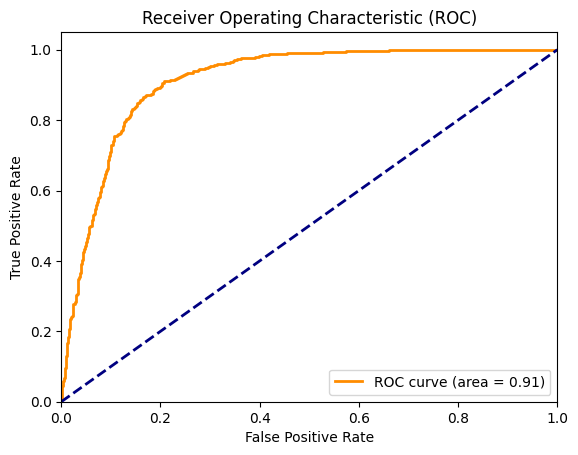

In [179]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()